In [1]:
# !pip install tensorflow plotly

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Carregando o dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Definindo os labels das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


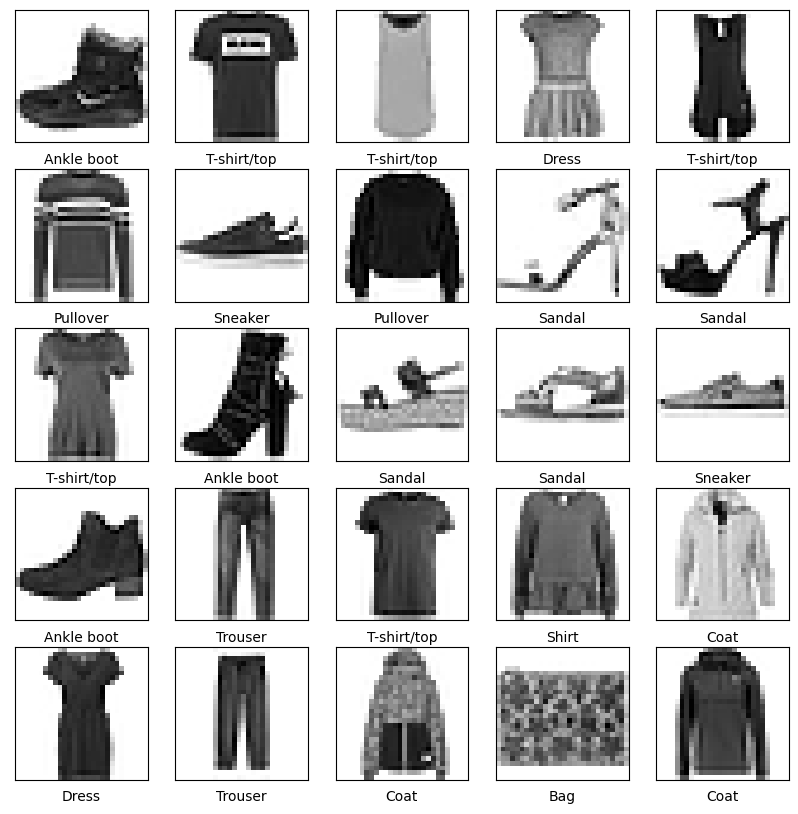

Distribuição das classes:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [3]:
# Verificando a forma dos dados
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Visualizando algumas imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Verificando a distribuição das classes
unique, counts = np.unique(y_train, return_counts=True)
print('Distribuição das classes: ', dict(zip(unique, counts)))

In [4]:
# Normalizando as imagens
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transformando os rótulos em categorias
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# arquitetura 1

In [5]:
# Construindo o modelo
model = tf.keras.models.Sequential()

# Primeira camada de convolução
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# Primeira camada de pooling
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Segunda camada de convolução
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Segunda camada de pooling
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Achatar a matriz em um vetor
model.add(tf.keras.layers.Flatten())

# Primeira camada totalmente conectada
model.add(tf.keras.layers.Dense(120, activation='tanh'))

# Segunda camada totalmente conectada
model.add(tf.keras.layers.Dense(84, activation='tanh'))

# Última camada totalmente conectada que deve ter o mesmo número de classes
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [6]:
# Definindo os callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('fashion_mnist_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4962 - accuracy: 0.8203 - val_loss: 0.4458 - val_accuracy: 0.8401
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3679 - accuracy: 0.8667 - val_loss: 0.3806 - val_accuracy: 0.8591
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3298 - accuracy: 0.8783 - val_loss: 0.3567 - val_accuracy: 0.8693
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3041 - accuracy: 0.8883 - val_loss: 0.3489 - val_accuracy: 0.8732
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2828 - accuracy: 0.8952 - val_loss: 0.3327 - val_accuracy: 0.8816
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2657 - accuracy: 0.9021 - val_loss: 0.3300 - val_accuracy: 0.8817
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2527 - accuracy: 0.9057 - val_loss: 0.3173 -

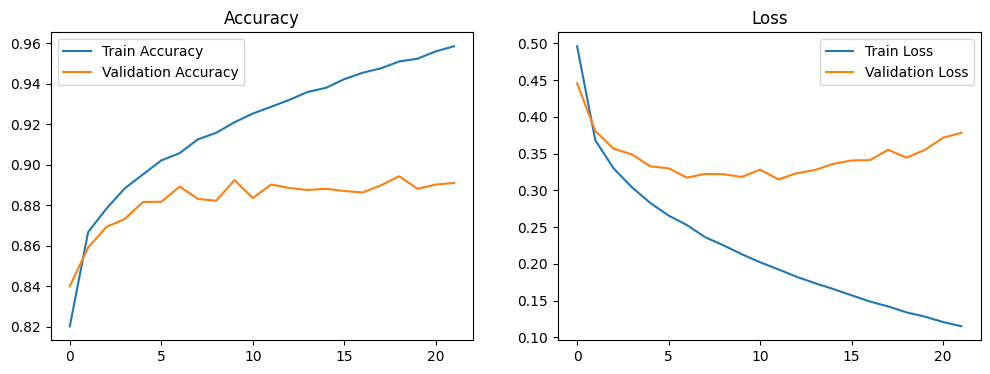

In [7]:
# Plotando a acurácia de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plotando a perda de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [8]:
# Avaliando o modelo no conjunto de testes
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8902
Test Loss: 0.314930260181427
Test Accuracy: 0.8902000188827515


# arquitetura 2

In [9]:
# Construindo o modelo
model = tf.keras.models.Sequential()

# Primeira camada de convolução
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))

# Primeira camada de pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Segunda camada de convolução
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Segunda camada de pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Achatar a matriz em um vetor
model.add(tf.keras.layers.Flatten())

# Primeira camada totalmente conectada
model.add(tf.keras.layers.Dense(120, activation='relu'))

# Segunda camada totalmente conectada
model.add(tf.keras.layers.Dense(84, activation='relu'))

# Última camada totalmente conectada que deve ter o mesmo número de classes
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [10]:
# Definindo os callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('fashion_mnist_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8249 - accuracy: 0.6955 - val_loss: 0.5748 - val_accuracy: 0.7835
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5169 - accuracy: 0.8087 - val_loss: 0.4725 - val_accuracy: 0.8275
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4464 - accuracy: 0.8362 - val_loss: 0.4662 - val_accuracy: 0.8290
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4068 - accuracy: 0.8522 - val_loss: 0.4043 - val_accuracy: 0.8579
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3783 - accuracy: 0.8615 - val_loss: 0.4241 - val_accuracy: 0.8502
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3570 - accuracy: 0.8700 - val_loss: 0.3916 - val_accuracy: 0.8541
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3403 - accuracy: 0.8745 - val_loss: 0.3557 -

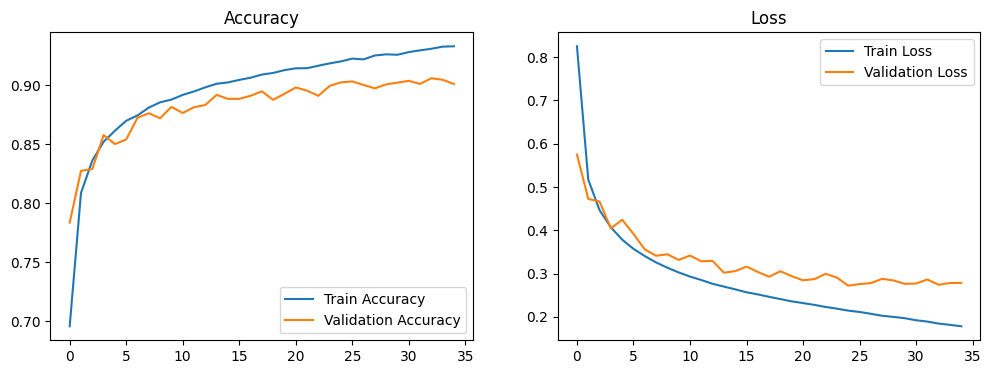

In [11]:
# Plotando a acurácia de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plotando a perda de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [12]:
# Avaliando o modelo no conjunto de testes
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2720 - accuracy: 0.9026
Test Loss: 0.2719663977622986
Test Accuracy: 0.9025999903678894
